In [3]:
from sagas.nlu.uni_cli import UniCli
from sagas.nlu.uni_viz import EnhancedViz
from sagas.nlu.corenlp_parser import get_chunks
from sagas.tool.misc import print_stem_chunks
from sagas.nlu.uni_intf import RootWordImpl, WordIntf, SentenceIntf
import sagas

def rs_summary(rs):
    for serial, r in enumerate(rs):
        df = sagas.to_df(r['domains'], ['rel', 'index', 'text', 'lemma', 'children', 'features'])
        if 'head' in r:
            cla="%s(%s)"%(r['head'], r['head_pos'])
        else:
            cla='_'
        print('%s(%s)' % (r['type'], r['lemma']), cla)
        # sagas.print_df(df)
        display(df)
        print_stem_chunks(r)
        
class JsonifyWordImpl(WordIntf):
    def setup(self, token):
        return token
    
class JsonifySentImpl(SentenceIntf):
    def setup(self, json_words):
        words = []
        print(f'words count {len(json_words)}')
        for word in json_words:
            words.append(JsonifyWordImpl(word))
        return words, []

def word_jsonify(word):
    features = ['index', 'text', 'lemma', 'upos', 'xpos', 'feats', 'governor', 'dependency_relation']
    feature_attrs = {k:getattr(word, k) for k in features if getattr(word, k) is not None}
    return feature_attrs

def sent_jsonify(doc):
    words=[]
    for word in doc.words:
        word_j=word_jsonify(word)
        print(word_j)
        words.append(word_j)
    return words

def viz_sample(lang, sents, engine='corenlp'):
    uni=UniCli()
    doc=uni.parsers[engine](lang, sents)
    # print(len(doc.words))
    words=sent_jsonify(doc)
    
    doc_jsonify=JsonifySentImpl(words)    
    rs = get_chunks(doc_jsonify)
    rs_summary(rs)

viz_sample('ja', "今何時ですか?")

{'index': '1', 'text': '今', 'lemma': '今', 'upos': 'NOUN', 'xpos': '_', 'feats': '_', 'governor': 2, 'dependency_relation': 'obl'}
{'index': '2', 'text': '何', 'lemma': '何', 'upos': 'NUM', 'xpos': '_', 'feats': 'NumType=Card', 'governor': 0, 'dependency_relation': 'root'}
{'index': '3', 'text': '時', 'lemma': '時', 'upos': 'NOUN', 'xpos': '_', 'feats': '_', 'governor': 2, 'dependency_relation': 'mark'}
{'index': '4', 'text': 'です', 'lemma': 'だ', 'upos': 'AUX', 'xpos': '_', 'feats': '_', 'governor': 2, 'dependency_relation': 'cop'}
{'index': '5', 'text': 'か', 'lemma': 'か', 'upos': 'PART', 'xpos': '_', 'feats': '_', 'governor': 2, 'dependency_relation': 'mark'}
{'index': '6', 'text': '?', 'lemma': '?', 'upos': 'PUNCT', 'xpos': '_', 'feats': '_', 'governor': 2, 'dependency_relation': 'punct'}
words count 6
aux_domains(だ) 何(num)


,rel,index,text,lemma,children,features
0,obl,1,今,今,[今],[c_noun]
1,mark,3,時,時,[時],[c_noun]
2,cop,4,です,だ,[です],[c_aux]
3,mark,5,か,か,[か],[c_part]
4,punct,6,?,?,[?],[c_punct]


.. request is {'lang': 'en', 'sents': 'I have to turn off the lights in the room.', 'engine': 'corenlp'}
words count 11
❶ verb_domains(have) _


,rel,index,text,lemma,children,features
0,nsubj,1,I,I,[I],"[c_pron, x_prp]"
1,xcomp,4,turn,turn,"[to, turn, off, the, lights, in, the, room]","[c_verb, x_vb]"
2,punct,11,.,.,[.],"[c_punct, x_.]"


xcomp -> to turn off the light in the room
index: 1	text: I 	lemma: I	upos: PRON	xpos: PRP
index: 2	text: have 	lemma: have	upos: VERB	xpos: VBP
index: 3	text: to 	lemma: to	upos: PART	xpos: TO
index: 4	text: turn 	lemma: turn	upos: VERB	xpos: VB
index: 5	text: off 	lemma: off	upos: ADP	xpos: RP
index: 6	text: the 	lemma: the	upos: DET	xpos: DT
index: 7	text: lights 	lemma: light	upos: NOUN	xpos: NNS
index: 8	text: in 	lemma: in	upos: ADP	xpos: IN
index: 9	text: the 	lemma: the	upos: DET	xpos: DT
index: 10	text: room 	lemma: room	upos: NOUN	xpos: NN
index: 11	text: . 	lemma: .	upos: PUNCT	xpos: .
I -> nsubj, 2, have
have -> root, 0, _root_
to -> mark, 4, turn
turn -> xcomp, 2, have
off -> compound:prt, 4, turn
the -> det, 7, lights
lights -> obj, 4, turn
in -> case, 10, room
the -> det, 10, room
room -> obl, 4, turn
. -> punct, 2, have
('I', '2', 'nsubj')
('have', 0, 'root')
('to', '4', 'mark')
('turn', '2', 'xcomp')
('off', '4', 'compound:prt')
('the', '7', 'det')
('lights', '4', 'obj

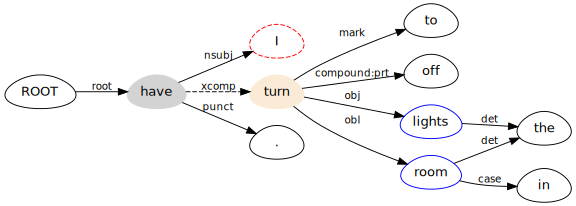

In [5]:
from sagas.nlu.uni_remote_viz import viz_sample as viz
en="I have to turn off the lights in the room."
zh="我必须关掉房间里的灯。"
ja="部屋の明かりを消さなければなりません。"
viz('en', en)

.. request is {'lang': 'ja', 'sents': '部屋の明かりを消さなければなりません。', 'engine': 'corenlp'}
words count 11
❶ verb_domains(消す) _


,rel,index,text,lemma,children,features
0,obj,3,明かり,明かる,"[部屋, の, 明かり, を]",[c_noun]
1,aux,6,なけれ,ない,[なけれ],[c_aux]
2,mark,7,ば,ば,[ば],[c_sconj]


obj -> 部屋 の 明かる を
❷ verb_domains(なる) _


,rel,index,text,lemma,children,features
0,advcl,5,消さ,消す,"[部屋, の, 明かり, を, 消さ, なけれ, ば]",[c_verb]
1,aux,9,ませ,ます,[ませ],[c_aux]
2,aux,10,ん,ない,[ん],[c_aux]
3,punct,11,。,。,[。],[c_punct]


advcl -> 部屋 の 明かる を 消す ない ば
index: 1	text: 部屋 	lemma: 部屋	upos: NOUN	xpos: _
index: 2	text: の 	lemma: の	upos: ADP	xpos: _
index: 3	text: 明かり 	lemma: 明かる	upos: NOUN	xpos: _
index: 4	text: を 	lemma: を	upos: ADP	xpos: _
index: 5	text: 消さ 	lemma: 消す	upos: VERB	xpos: _
index: 6	text: なけれ 	lemma: ない	upos: AUX	xpos: _
index: 7	text: ば 	lemma: ば	upos: SCONJ	xpos: _
index: 8	text: なり 	lemma: なる	upos: VERB	xpos: _
index: 9	text: ませ 	lemma: ます	upos: AUX	xpos: _
index: 10	text: ん 	lemma: ない	upos: AUX	xpos: _
index: 11	text: 。 	lemma: 。	upos: PUNCT	xpos: _
部屋 -> nmod, 3, 明かり
の -> case, 1, 部屋
明かり -> obj, 5, 消さ
を -> case, 3, 明かり
消さ -> advcl, 8, なり
なけれ -> aux, 5, 消さ
ば -> mark, 5, 消さ
なり -> root, 0, _root_
ませ -> aux, 8, なり
ん -> aux, 8, なり
。 -> punct, 8, なり
('部屋', '3', 'nmod')
('の', '1', 'case')
('明かり', '5', 'obj')
('を', '3', 'case')
('消さ', '8', 'advcl')
('なけれ', '5', 'aux')
('ば', '5', 'mark')
('なり', 0, 'root')
('ませ', '8', 'aux')
('ん', '8', 'aux')
('。', '8', 'punct')


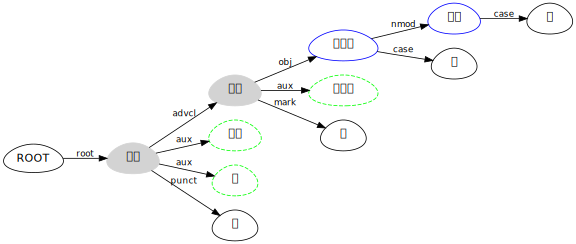

In [6]:
viz('ja', ja)

.. request is {'lang': 'zh', 'sents': '我必须关掉房间里的灯。', 'engine': 'ltp'}
words count 8
❶ verb_domains(关掉) _


,rel,index,text,lemma,children,features
0,sbv,1,我,我,[我],"[c_pron, x_r]"
1,adv,2,必须,必须,[必须],"[c_adv, x_d]"
2,vob,7,灯,灯,"[房间, 里, 的, 灯]","[c_noun, x_n]"
3,wp,8,。,。,[。],"[c_punct, x_wp]"


vob -> 房间 里 的 灯
index: 1	text: 我 	lemma: 我	upos: PRON	xpos: r
index: 2	text: 必须 	lemma: 必须	upos: ADV	xpos: d
index: 3	text: 关掉 	lemma: 关掉	upos: VERB	xpos: v
index: 4	text: 房间 	lemma: 房间	upos: NOUN	xpos: n
index: 5	text: 里 	lemma: 里	upos: NOUN	xpos: nd
index: 6	text: 的 	lemma: 的	upos: AUX	xpos: u
index: 7	text: 灯 	lemma: 灯	upos: NOUN	xpos: n
index: 8	text: 。 	lemma: 。	upos: PUNCT	xpos: wp
我 -> sbv, 3, 关掉
必须 -> adv, 3, 关掉
关掉 -> hed, 0, _root_
房间 -> att, 5, 里
里 -> att, 7, 灯
的 -> rad, 5, 里
灯 -> vob, 3, 关掉
。 -> wp, 3, 关掉
('我', 3, 'sbv')
('必须', 3, 'adv')
('关掉', 0, 'hed')
('房间', 5, 'att')
('里', 7, 'att')
('的', 5, 'rad')
('灯', 3, 'vob')
('。', 3, 'wp')


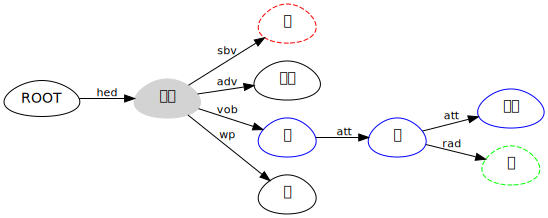

In [7]:
viz('zh', zh, 'ltp')